<h2> Simulações: Capítulo 4

In [1]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 20.8 MB/s eta 0:00:00


**Simulação 1: Máquinas de Perfuração do Canal da Mancha**

**Objetivo:** mostrar a resposta ao degrau e a resposta à perturbação para o sistema de controle das máquinas de perfuração do Canal da Mancha.


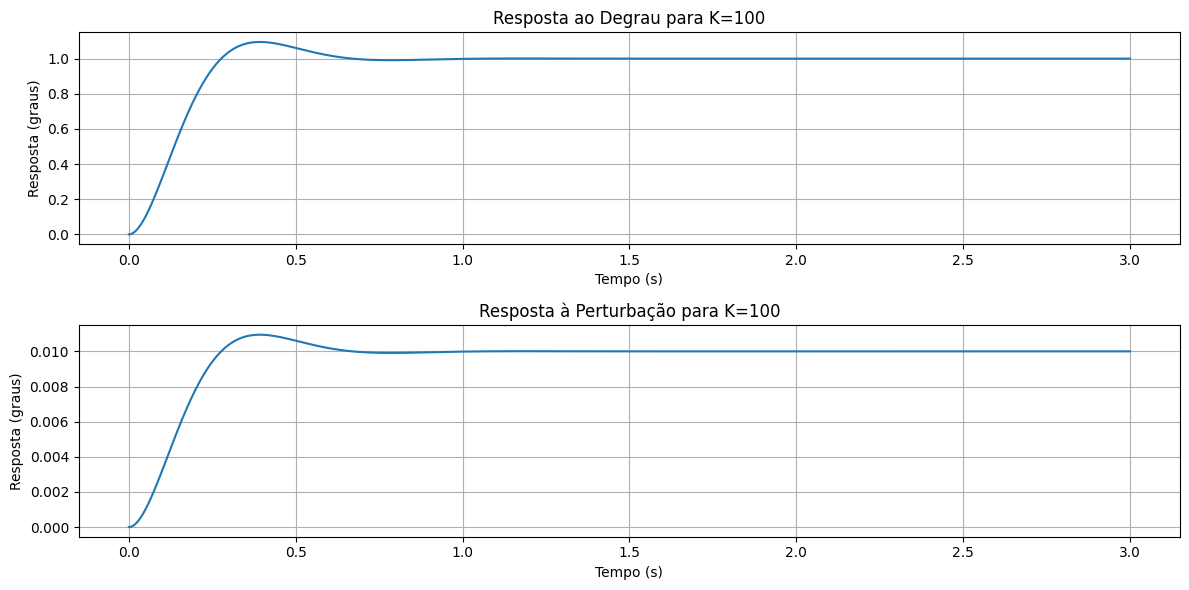

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctrl

K1 = 100
num1 = [K1]
den1 = [1, 12, K1]
system1 = ctrl.TransferFunction(num1, den1)


time = np.linspace(0, 3, 1000)
time, step_response = ctrl.step_response(system1, T=time)

num_disturbance = [1]
den_disturbance = [1, 12, K1]
system_disturbance = ctrl.TransferFunction(num_disturbance, den_disturbance)
time, disturbance_response = ctrl.step_response(system_disturbance, T=time)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, step_response)
plt.title('Resposta ao Degrau para K=100')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta (graus)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time, disturbance_response)
plt.title('Resposta à Perturbação para K=100')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta (graus)')
plt.grid(True)

plt.tight_layout()
plt.show()

**Simulação 2: Controle da Pressão Arterial Durante Anestesi**

**Objetivo:** mostrar a resposta ao degrau para diferentes controladores PID no sistema de controle da pressão arterial durante a anestesia.

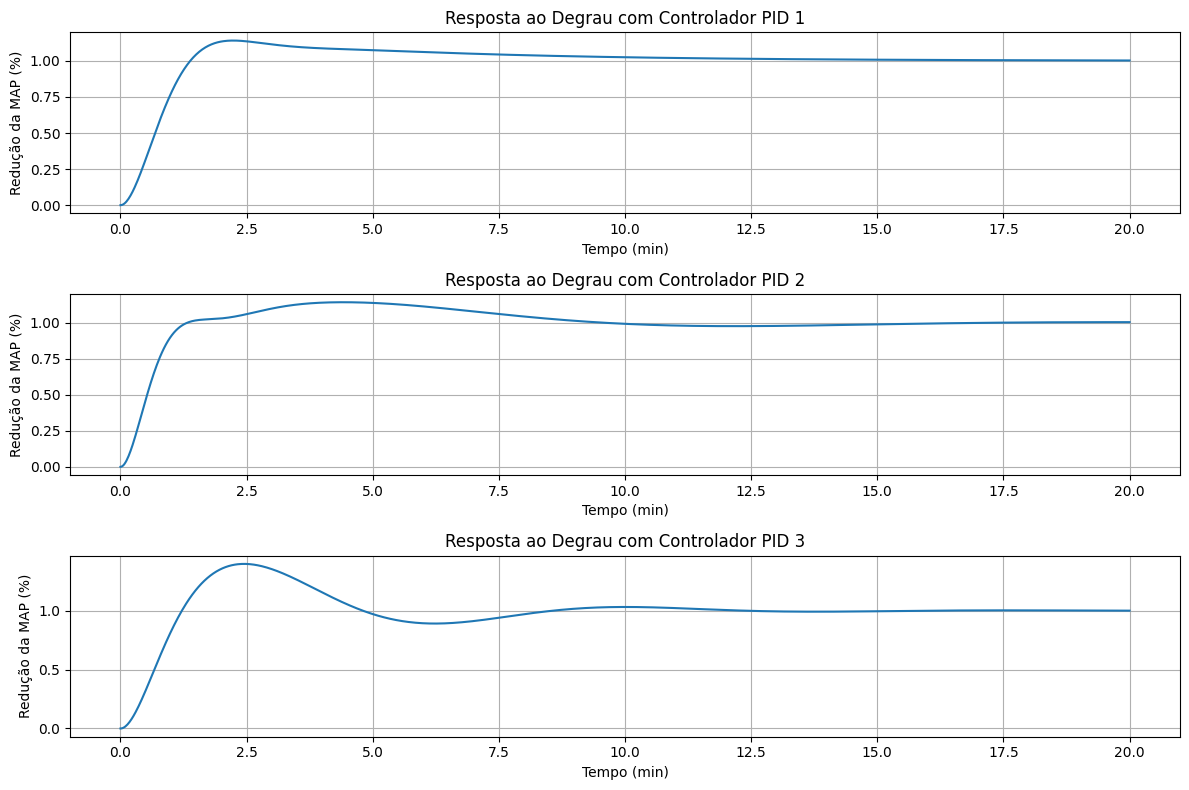

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctrl

# Definir a função de transferência para o paciente e a bomba
p = 2
Gp = ctrl.TransferFunction([1], [1, 0])
G_patient = ctrl.TransferFunction([1], [1, 2*p, p**2])

# Definir os controladores PID
Kp1, Kd1, Ki1 = 6, 4, 1
Kp2, Kd2, Ki2 = 5, 7, 2
Kp3, Kd3, Ki3 = 6, 4, 4

PID1 = ctrl.TransferFunction([Kd1, Kp1, Ki1], [1, 0])
PID2 = ctrl.TransferFunction([Kd2, Kp2, Ki2], [1, 0])
PID3 = ctrl.TransferFunction([Kd3, Kp3, Ki3], [1, 0])

# Funções de transferência em malha fechada
system_PID1 = ctrl.feedback(PID1 * Gp * G_patient)
system_PID2 = ctrl.feedback(PID2 * Gp * G_patient)
system_PID3 = ctrl.feedback(PID3 * Gp * G_patient)

time = np.linspace(0, 20, 1000)
time_PID1, response_PID1 = ctrl.step_response(system_PID1, T=time)
time_PID2, response_PID2 = ctrl.step_response(system_PID2, T=time)
time_PID3, response_PID3 = ctrl.step_response(system_PID3, T=time)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time_PID1, response_PID1)
plt.title('Resposta ao Degrau com Controlador PID 1')
plt.xlabel('Tempo (min)')
plt.ylabel('Redução da MAP (%)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(time_PID2, response_PID2)
plt.title('Resposta ao Degrau com Controlador PID 2')
plt.xlabel('Tempo (min)')
plt.ylabel('Redução da MAP (%)')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(time_PID3, response_PID3)
plt.title('Resposta ao Degrau com Controlador PID 3')
plt.xlabel('Tempo (min)')
plt.ylabel('Redução da MAP (%)')
plt.grid(True)

plt.tight_layout()
plt.show()